# Power Outages
This project uses major power outage data in the continental U.S. from January 2000 to July 2016. Here, a major power  outage is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300MW. Interesting questions to consider include:
- Where and when do major power outages tend to occur?
- What are the characteristics of major power outages with higher severity? Variables to consider include location, time, climate, land-use characteristics, electricity consumption patterns, economic characteristics, etc. What risk factors may an energy company want to look into when predicting the location and severity of its next major power outage?
- What characteristics are associated with each category of cause?
- How have characteristics of major power outages changed over time? Is there a clear trend?

### Getting the Data
The data is downloadable [here](https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks).

A data dictionary is available at this [article](https://www.sciencedirect.com/science/article/pii/S2352340918307182) under *Table 1. Variable descriptions*.

### Cleaning and EDA
- Note that the data is given as an Excel file rather than a CSV. Open the data in Excel or another spreadsheet application and determine which rows and columns of the Excel spreadsheet should be ignored when loading the data in pandas.
- Clean the data.
    - The power outage start date and time is given by `OUTAGE.START.DATE` and `OUTAGE.START.TIME`. It would be preferable if these two columns were combined into one datetime column. Combine `OUTAGE.START.DATE` and `OUTAGE.START.TIME` into a new datetime column called `OUTAGE.START`. Similarly, combine `OUTAGE.RESTORATION.DATE` and `OUTAGE.RESTORATION.TIME` into a new datetime column called `OUTAGE.RESTORATION`.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

*Hint 1: pandas can load multiple filetypes: `pd.read_csv`, `pd.read_excel`, `pd.read_html`, `pd.read_json`, etc.*

*Hint 2: `pd.to_datetime` and `pd.to_timedelta` will be useful here.*

*Tip: To visualize geospatial data, consider [Folium](https://python-visualization.github.io/folium/) or another geospatial plotting library.*

### Assessment of Missingness
- Assess the missingness of a column that is not missing by  design.

### Hypothesis Test
Find a hypothesis test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
TODO

### Cleaning and EDA
first combine date and time column <br>
then filter out outage that affect more than 50,000 customers or caused an unplanned firm load loss of at least 300MW.<br>
cast column of year and month to int since its not reasonable to have them as float value<br>
Change the data type of column 'ANOMALY.LEVEL' to float<br>


### Assessment of Missingness
TODO

### Hypothesis Test
TODO

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

In [2]:
df = pd.read_excel('outage.xlsx', header = 5).iloc[1:,2:]
df['OUTAGE.START'] = pd.to_datetime(df['OUTAGE.START.DATE']) + pd.to_timedelta(df['OUTAGE.START.TIME'].astype(str))
df['OUTAGE.RESTORATION'] = pd.to_datetime(df['OUTAGE.RESTORATION.DATE']) + pd.to_timedelta(df['OUTAGE.RESTORATION.TIME'].astype(str))
df.drop(columns = ['OUTAGE.START.DATE', 'OUTAGE.START.TIME', 
                   'OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME'], inplace = True)
df = df[(df['CUSTOMERS.AFFECTED'] >= 50000) | (df['DEMAND.LOSS.MW'] >= 300)] #only concerned with major outages
df['ANOMALY.LEVEL'] = df['ANOMALY.LEVEL'].astype('float')
df.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,...,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,OUTAGE.START,OUTAGE.RESTORATION
1,2011.0,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,severe weather,NaN,...,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2011-07-01 17:00:00,2011-07-03 20:00:00
3,2010.0,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,severe weather,heavy wind,...,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2010-10-26 20:00:00,2010-10-28 22:00:00
4,2012.0,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,severe weather,thunderstorm,...,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2012-06-19 04:30:00,2012-06-20 23:00:00
5,2015.0,7.0,Minnesota,MN,MRO,East North Central,1.2,warm,severe weather,NaN,...,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2015-07-18 02:00:00,2015-07-19 07:00:00
6,2010.0,11.0,Minnesota,MN,MRO,East North Central,-1.4,cold,severe weather,winter storm,...,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2010-11-13 15:00:00,2010-11-14 22:00:00


In [3]:
df.columns

Index(['YEAR', 'MONTH', 'U.S._STATE', 'POSTAL.CODE', 'NERC.REGION',
       'CLIMATE.REGION', 'ANOMALY.LEVEL', 'CLIMATE.CATEGORY', 'CAUSE.CATEGORY',
       'CAUSE.CATEGORY.DETAIL', 'HURRICANE.NAMES', 'OUTAGE.DURATION',
       'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED', 'RES.PRICE', 'COM.PRICE',
       'IND.PRICE', 'TOTAL.PRICE', 'RES.SALES', 'COM.SALES', 'IND.SALES',
       'TOTAL.SALES', 'RES.PERCEN', 'COM.PERCEN', 'IND.PERCEN',
       'RES.CUSTOMERS', 'COM.CUSTOMERS', 'IND.CUSTOMERS', 'TOTAL.CUSTOMERS',
       'RES.CUST.PCT', 'COM.CUST.PCT', 'IND.CUST.PCT', 'PC.REALGSP.STATE',
       'PC.REALGSP.USA', 'PC.REALGSP.REL', 'PC.REALGSP.CHANGE', 'UTIL.REALGSP',
       'TOTAL.REALGSP', 'UTIL.CONTRI', 'PI.UTIL.OFUSA', 'POPULATION',
       'POPPCT_URBAN', 'POPPCT_UC', 'POPDEN_URBAN', 'POPDEN_UC',
       'POPDEN_RURAL', 'AREAPCT_URBAN', 'AREAPCT_UC', 'PCT_LAND',
       'PCT_WATER_TOT', 'PCT_WATER_INLAND', 'OUTAGE.START',
       'OUTAGE.RESTORATION'],
      dtype='object')

### Assessment of Missingness

In [4]:
# get all the column with missing values
missing = df[df.columns[df.isnull().any()]].isnull().sum().sort_values(ascending=False)[:7]
missing

HURRICANE.NAMES          749
DEMAND.LOSS.MW           340
CAUSE.CATEGORY.DETAIL    243
CUSTOMERS.AFFECTED        69
OUTAGE.RESTORATION        19
OUTAGE.DURATION           19
RES.SALES                 10
dtype: int64

Among all the columns with missing value, columns of <b>CAUSE.CATEGORY.DETAIL</b>, <b>HURRICANE.NAMES</b>, and <b>DEMAND.LOSS.MW</b> has a non-trival amount of missingness. <br>

We then decided to anaylze the type of the missingness of column <b>CAUSE.CATEGORY.DETAIL</b>.<br>

Since the column "CAUSE.CATEGORY.DETAIL" expand on the column "CAUSE.CATEGORY", we first analyze if the missingness in the column that we are interested in depend on the "CAUSE.CATEGORY" column. 

<AxesSubplot:ylabel='CAUSE.CATEGORY'>

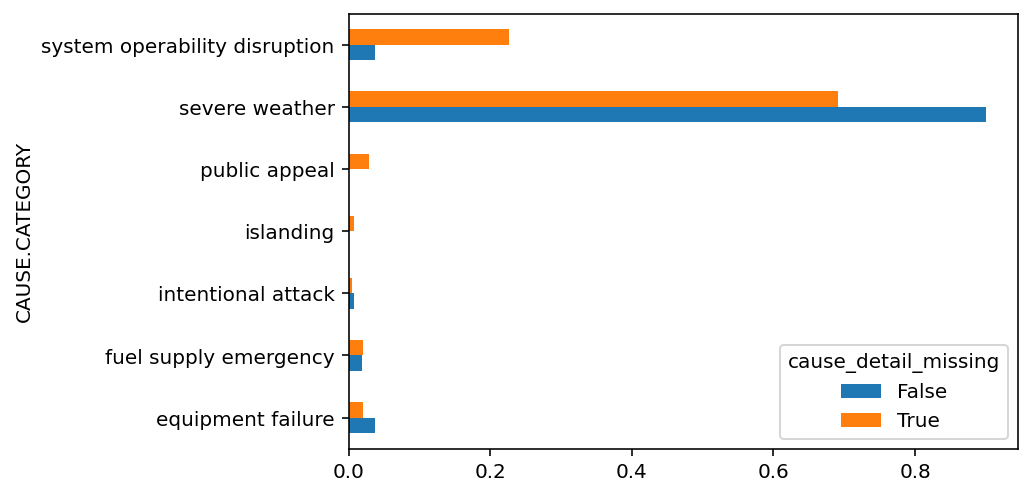

In [5]:
# plot out the distribution
assert_missingness = df.copy()
assert_missingness['cause_detail_missing'] = assert_missingness['CAUSE.CATEGORY.DETAIL'].isna()
emp_distributions = (
    assert_missingness
    .pivot_table(index='CAUSE.CATEGORY', columns='cause_detail_missing', values=None, aggfunc='size')
    .fillna(0)
    .apply(lambda x: x / x.sum())
)
emp_distributions.plot(kind='barh')

As shown in the bar chart above, there is a significant difference between the amount of data that is missing or not in our target column when the cause category of an outage is "system operability disruption". The difference 

In order to test whether the missingness in the column <b>"CAUSE.CATEGORY.DETAIL"</b> depends on column <b>"CAUSE.CATEGORY"</b>, we decide to perform a permutation test on these two cloumns.<br>

<b>Null Hypothese ($H_0$)</b>: the missingness in column "CAUSE.CATEGORY.DETAIL" does NOT depend on column "CAUSE.CATEGORY"<br>
<b>Alternative Hypothese ($H_1$)</b>: the missingness in column "CAUSE.CATEGORY.DETAIL" depend on column "CAUSE.CATEGORY"

In [6]:
# calculate the observed tvd
observed_tvd = emp_distributions.diff(axis=1).iloc[:, -1].abs().sum() / 2
observed_tvd

0.22820148836409002

In [7]:
# perform a permutation test
shuffled = assert_missingness.copy()[['CAUSE.CATEGORY', 'cause_detail_missing']]

n_repetitions = 5000
tvds = []

for _ in range(n_repetitions):
    
    # Shuffling the column and assigning it to the DataFrame
    shuffled['CAUSE.CATEGORY'] = np.random.permutation(shuffled['CAUSE.CATEGORY'])
    
    # Computing and storing the TVD
    pivoted = (
        shuffled
        .pivot_table(index='CAUSE.CATEGORY', columns='cause_detail_missing', values=None, aggfunc='size')
        .fillna(0)
        .apply(lambda x: x / x.sum())
    )
    
    tvd = pivoted.diff(axis=1).iloc[:, -1].abs().sum() / 2
    tvds.append(tvd)

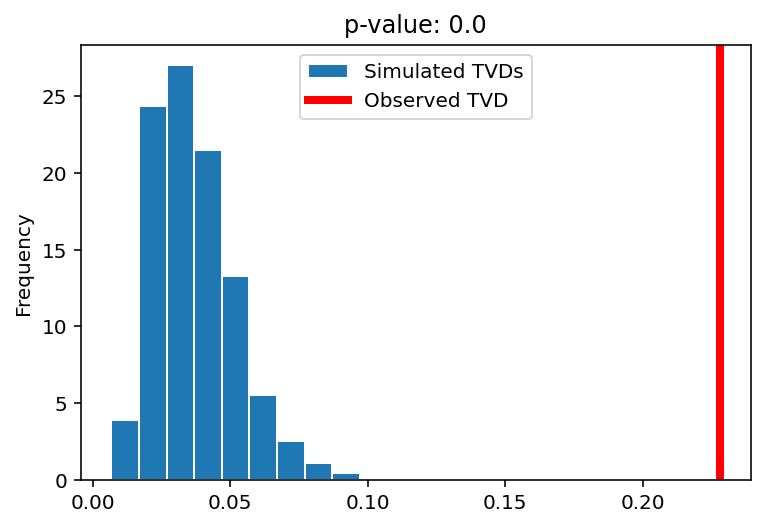

In [8]:
# calculate the p-val of the permutation test and plot out the result
pval = np.mean(tvds >= observed_tvd)

pd.Series(tvds).plot(kind='hist', density=True, ec='w', bins=10, title=f'p-value: {pval}', label='Simulated TVDs')
plt.axvline(x=observed_tvd, color='red', linewidth=4, label='Observed TVD')
plt.legend();

p-value of 0.0 indicates that we reject our null hypothesis and claim that the missingness in column "CAUSE.CATEGORY.DETAIL" depend on column "CAUSE.CATEGORY". This result is also illustrate in the histogram above as all the tvd of our simulated data all lies on the left side of our observed tvd, which is indicated as the red line. 

Then, in order to find out whether the missingness of "CAUSE.CATEGORY.DETAIL" depends on other columns, we decide to perform permutation tests on them in order to find what other columns contribute to the missingness of our target column. We decide to focuse on columns of 'U.S._STATE', 'POSTAL.CODE', 'NERC.REGION', 'CLIMATE.REGION', 'ANOMALY.LEVEL', and 'CLIMATE.CATEGORY' since the data for other columns are the same for diferent states. 



In [9]:
# define a function called permutation_miss which takes in the column to permutate on and a dataframe.
# Returns a lis tof tvd
def permutation_miss(column, df):
    shuffled = df.copy()[[column, 'cause_detail_missing']]

    n_repetitions = 5000
    tvds = []

    for _ in range(n_repetitions):

        # Shuffling the coloum and assigning it to the DataFrame
        shuffled[column] = np.random.permutation(shuffled[column])

        # Computing and storing the TVD
        pivoted = (
            shuffled
            .pivot_table(index=column, columns='cause_detail_missing', values=None, aggfunc='size')
            .fillna(0)
            .apply(lambda x: x / x.sum())
        )

        tvd = pivoted.diff(axis=1).iloc[:, -1].abs().sum() / 2
        tvds.append(tvd)
    return tvds

In [10]:
# get other columns that we'd like to test on
other_columns = df.columns[2:8]
other_columns

Index(['U.S._STATE', 'POSTAL.CODE', 'NERC.REGION', 'CLIMATE.REGION',
       'ANOMALY.LEVEL', 'CLIMATE.CATEGORY'],
      dtype='object')

In [11]:
# perform permutation tests on all the column mentioned above.
# use tvd as test statistic
p_values = {}
for column in other_columns:
    emp_distributions = (
        assert_missingness
        .pivot_table(index=column, columns='cause_detail_missing', values=None, aggfunc='size')
        .fillna(0)
        .apply(lambda x: x / x.sum())
    )
    observed_tvd = emp_distributions.diff(axis=1).iloc[:, -1].abs().sum() / 2
    tvds = permutation_miss(column, assert_missingness)
    p_values[column] = np.mean(tvds >= observed_tvd)
p_values

{'U.S._STATE': 0.0014,
 'POSTAL.CODE': 0.0012,
 'NERC.REGION': 0.0036,
 'CLIMATE.REGION': 0.012,
 'ANOMALY.LEVEL': 0.0,
 'CLIMATE.CATEGORY': 0.0}

As shown in the p-values above, it seems that all the columns we verified somehow is related to the miissingness of column "CAUSE.CATEGORY.DETAIL". However, we than notice that column 'ANOMALY.LEVEL' has numeric data such that it is unreasonable to use tvd as test statisitc. So we then use the absolute mean difference as the test statistic and perform permutation test on that column again. 

cause_detail_missing
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: ANOMALY.LEVEL, dtype: object

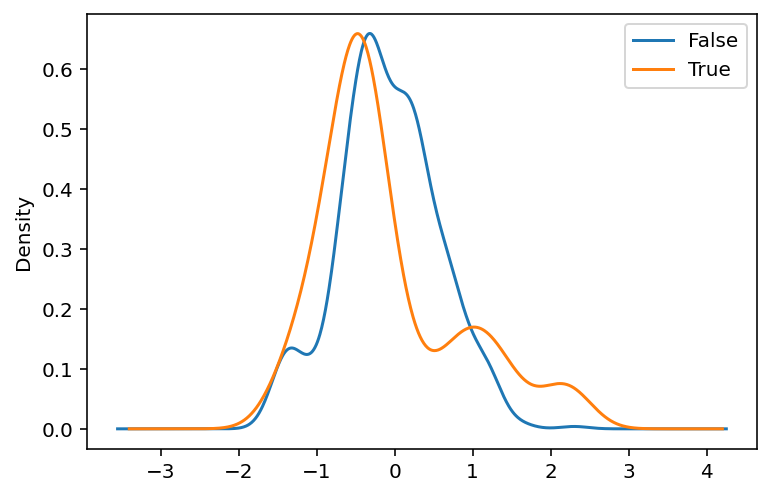

In [12]:
# plot out the two distribution
assert_missingness.groupby('cause_detail_missing')['ANOMALY.LEVEL'].plot(kind='kde', legend=True)

In [13]:
# find the observed test statistic
obs = assert_missingness.groupby('cause_detail_missing')['ANOMALY.LEVEL'].mean().diff().abs().iloc[-1]
obs

0.018353909465020565

In [14]:
# permutation test on column "ANOMALY.LEVEL"
n_repetitions = 5000
shuffled = assert_missingness.copy()[['cause_detail_missing', 'ANOMALY.LEVEL']]

diff_means = []
for _ in range(n_repetitions):
    
    # Shuffling the data and assigning it back to the DataFrame
    shuffled['ANOMALY.LEVEL'] = np.random.permutation(shuffled['ANOMALY.LEVEL'])
    
    # Computing and storing the absolute difference in means
    diff_mean = shuffled.groupby('cause_detail_missing')['ANOMALY.LEVEL'].mean().diff().abs().iloc[-1]
    diff_means.append(diff_mean)


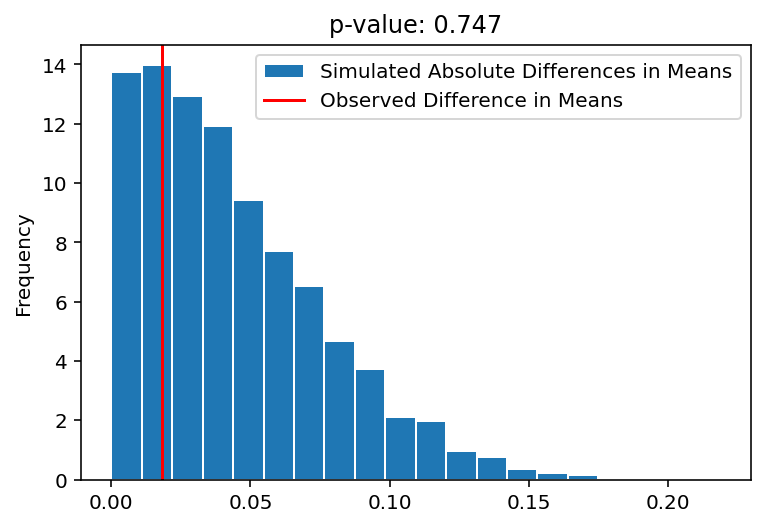

In [15]:
# compute p-value and plot out the result
pval = np.mean(np.array(diff_means) >= obs)

pd.Series(diff_means).plot(kind='hist', density=True, ec='w', bins=20, title=f'p-value: {pval}', label='Simulated Absolute Differences in Means')
plt.axvline(obs, color='red', label='Observed Difference in Means')
plt.legend();

The p-value now is 0.739, which is greater then 0.05 threshold. We thus fail to reject our null and claim that the missinness in column "CAUSE.CATEGORY.DETAIL" does NOT depend on column "ANOMALY.LEVEL". 

In general, we found that the missinness in column "CAUSE.CATEGORY.DETAIL" depends on the columns of {'U.S._STATE', 'POSTAL.CODE', 'NERC.REGION', 'CLIMATE.REGION', CAUSE.CATEGORY, 'CLIMATE.CATEGORY'} yet does not depend on columns "ANOMALY.LEVEL".

### Hypothesis Test

In [16]:
# TODO